# Part II - (The Effect the User_type and Gender have on the Trip_duration)
## by (Daniel Obioha)

>**Before you start**: You must have the README.md file ready that include a summary of main findings that reflects on the steps taken during the data exploration (Part I notebook). The README.md file should also describes the key insights that will be conveyed by the explanatory slide deck (Part II  outcome)



## Investigation Overview


>In this investigation I am going to explain how the user_type and their gender play a big role determining how long a bike is used for.  


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
>The dataset had features like ;
- User Type
- Member_gender
- End Station ID
- Start Time and Date
- Start Station ID
- End Time and Date
- Bike ID
> I am going to be focusing on two major columns which I stated to be 'Member_gender and 'User_type'.In the User_type we have two values which are Subscribers (A user with a subscription plan.) and Customers (A user who purchases individual flights.).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('fordgobike_master_dataset.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Variation in the User_type and Gender Column)
> This visualisation is going to depict how the values in each column vary by count. 
- In the User_type column its shown that the Subscribers are more than the Customers and the difference is very big as the Subcribers have 89.17% count while  the customers have 10.83% which is really low .
- In the Gender column the gender with the highest count being the male had over 120,000 count , the female had over 30,000 count and the other had less than 20,000 count

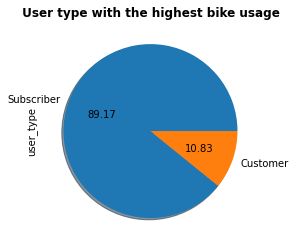

In [3]:

df['user_type'].value_counts().plot(kind='pie',autopct='%.2f',shadow=True,figsize=(14,4))
plt.title(' User type with the highest bike usage ',fontweight='bold')
plt.show();


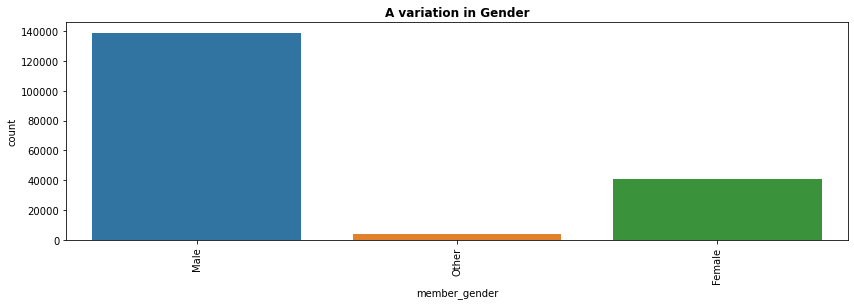

In [4]:
plt.figure(figsize=(14,4))
sns.countplot(x= "member_gender",data= df)
plt.xticks(rotation= 90)
plt.title("A variation in Gender",fontweight='bold');

## (The Gender and User_type that engage in long trips)

- User_type: Customers have longer trips than the subscribers .
 - Gender: Other gender have longer trip compared to males and females .

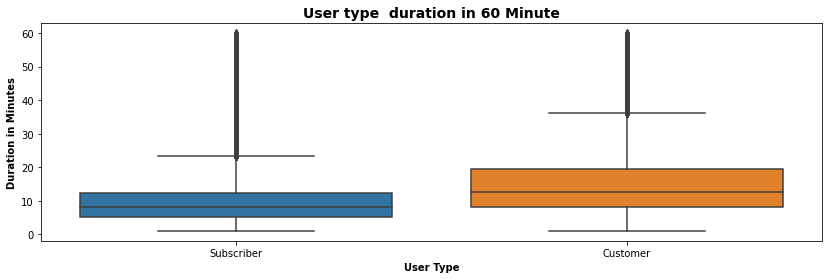

In [5]:
#setting duration_min less than or equal to 60 minutes to avoid outliers
minutes = df[df['duration_min']<=60]

#user_type against duration_min using violinplot
plt.figure(figsize=[14,4])
sns.boxplot(data=minutes,x= 'user_type',y='duration_min')
plt.title('User type  duration in 60 Minute',fontsize=14,fontweight='bold')
plt.xlabel('User Type',fontsize=10,fontweight='bold')
plt.ylabel('Duration in Minutes',fontsize=10,fontweight='bold');



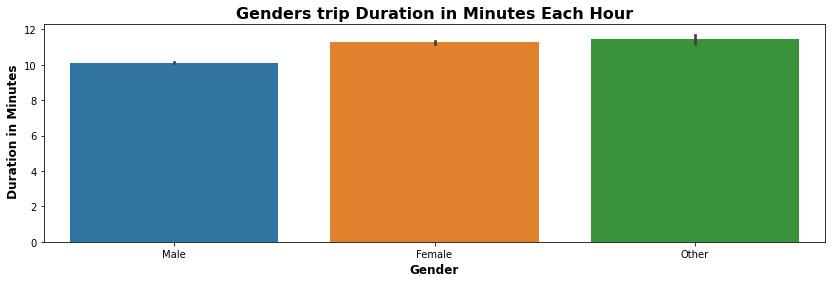

In [6]:
#member_gender against duration_min using violinplot
plt.figure(figsize=(14,4))
sns.barplot(data=minutes, x= 'member_gender', y='duration_min')
plt.xlabel('Gender', fontweight='bold', fontsize=12)
plt.ylabel(' Duration in Minutes', fontsize=12, fontweight='bold')
plt.title('Genders trip Duration in Minutes Each Hour', fontsize=16, fontweight='bold');

## (Predictiong which Gender in each User_type have the longest trip on specific days of the week)
> From general investigation its safe to say that if a cutomer who is female purchaces a bike for a trip on weekends the  probability of the trip being long is very high.

>From the investigations , if a subscriber that purchased the bike is an other gender on weekend then the duration of the trip is likely to be very long .


<Figure size 1440x720 with 0 Axes>

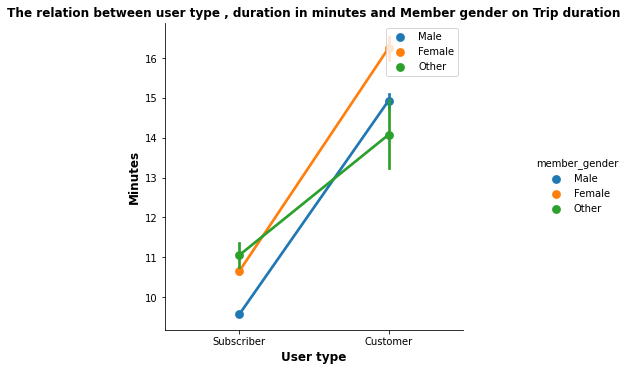

In [7]:
plt.figure(figsize=[20,10])

sns.catplot(x='user_type',y='duration_min',hue="member_gender",kind='point',data=minutes)
plt.legend(loc=1)
plt.title('The relation between user type , duration in minutes and Member gender on Trip duration',
          fontweight='bold', fontsize=12)
plt.xlabel('User type', fontweight='bold', fontsize=12)
plt.ylabel('Minutes',fontweight='bold', fontsize=12);

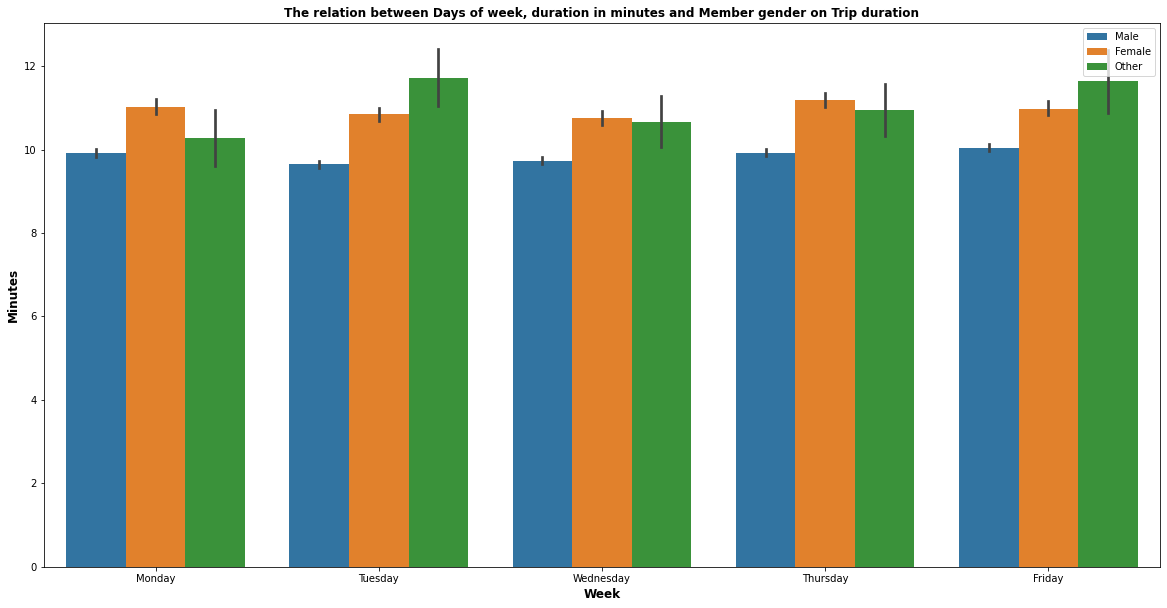

In [8]:
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday']

plt.figure(figsize=[20,10])
sns.barplot(data=minutes,x='start_day',y='duration_min',hue='member_gender',order=day_order)
plt.legend(loc=1)
plt.title('The relation between Days of week, duration in minutes and Member gender on Trip duration',
          fontweight='bold', fontsize=12)
plt.xlabel('Week', fontweight='bold', fontsize=12)
plt.ylabel('Minutes',fontweight='bold', fontsize=12);

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Explanation_data.ipynb --to slides --post serve --no-input --no-prompt